In [ ]:
import cv2
import matplotlib.pyplot as plt
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Input
from tensorflow.keras.applications import MobileNet,Xception,VGG19,ResNet50,InceptionV3,InceptionResNetV2,DenseNet121,NASNetMobile
from sklearn.model_selection import train_test_split

In [ ]:
trainc=[cv2.imread(file) for file in glob.glob("D:/CatsAndDogs/training_set/training_set/cats/cat.*.jpg")]
traind=[cv2.imread(file) for file in glob.glob("D:/CatsAndDogs/training_set/training_set/dogs/dog.*.jpg")]
testc=[cv2.imread(file) for file in glob.glob("D:/CatsAndDogs/test_set/test_set/cats/cat.*.jpg")]
testd=[cv2.imread(file) for file in glob.glob("D:/CatsAndDogs/test_set/test_set/dogs/dog.*.jpg")]
final=np.append(np.append(trainc,testc),np.append(traind,testd))
final = np.array([cv2.resize(file, (75, 75))  for file in final])
X=final
y=np.append(np.full(len(trainc)+len(testc),0),np.full(len(traind)+len(testd),1))
y=y.reshape(-1,1)
X=X/255
del [final,trainc,traind,testc,testd]
import gc
gc.collect()
gc.collect()
gc.collect()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
del [X,y]
gc.collect()
gc.collect()
gc.collect()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


0

In [ ]:
trainaccs=[]
testaccs=[]
names=['Mobile Net','Xception','VGG19','ResNet 50','InceptionV3'
       ,'InceptionResNetV2','DenseNet121'
       ,'NASNetMobile','25% Freezing (Xception)','50% Freezing (Xception)','75% Freezing (Xception)','100% Freezing (Xception)']

# Mobile Net

In [ ]:
model=Sequential()
model.add(MobileNet(include_top=False,input_shape=(75,75,3)))
model.add(Flatten())
model.add(Dense(1,activation="relu"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train,y_train,epochs=5)
x.loc[names[0]]=model.evaluate(X_train,y_train)[1],model.evaluate(X_test,y_test)[1]
with open('accuracies.pickle','wb') as f:
    pickle.dump(x,f)
gc.collect()
gc.collect()
gc.collect()
gc.collect()

Epoch 1/5
220/220 [==============================] - 10s 45ms/step - loss: 6.1404 - accuracy: 0.5891
Epoch 2/5
220/220 [==============================] - 9s 42ms/step - loss: 5.8844 - accuracy: 0.6108
Epoch 3/5
220/220 [==============================] - 9s 42ms/step - loss: 6.3111 - accuracy: 0.5846
Epoch 4/5
220/220 [==============================] - 9s 42ms/step - loss: 6.8434 - accuracy: 0.5499
Epoch 5/5
95/95 [==============================] - 1s 15ms/step - loss: 7.6354 - accuracy: 0.5018


0

# Xception

In [ ]:
model=Sequential()
model.add(Xception(include_top=False,input_shape=(75,75,3)))
model.add(Flatten())
model.add(Dense(1,activation="relu"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train,y_train,epochs=5,batch_size=128)
x.loc[names[1]]=model.evaluate(X_train,y_train)[1],model.evaluate(X_test,y_test)[1]
with open('accuracies.pickle','wb') as f:
    pickle.dump(x,f)
gc.collect()
gc.collect()
gc.collect()
gc.collect()

Epoch 1/5
55/55 [==============================] - 36s 658ms/step - loss: 1.6436 - accuracy: 0.7342
Epoch 2/5
55/55 [==============================] - 34s 619ms/step - loss: 0.8410 - accuracy: 0.7936
Epoch 3/5
55/55 [==============================] - 34s 624ms/step - loss: 0.6109 - accuracy: 0.8215
Epoch 4/5
55/55 [==============================] - 35s 628ms/step - loss: 0.6905 - accuracy: 0.8015
Epoch 5/5
95/95 [==============================] - 5s 55ms/step - loss: 1.3579 - accuracy: 0.8451


0

# VGG19

In [ ]:
model=Sequential()
model.add(VGG19(include_top=False,input_shape=(75,75,3)))
model.add(Flatten())
model.add(Dense(1,activation="relu"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train,y_train,epochs=5,batch_size=128)
x.loc[names[2]]=model.evaluate(X_train,y_train)[1],model.evaluate(X_test,y_test)[1]
with open('accuracies.pickle','wb') as f:
    pickle.dump(x,f)
gc.collect()
gc.collect()
gc.collect()
gc.collect()

Epoch 1/5
55/55 [==============================] - 35s 640ms/step - loss: 7.5750 - accuracy: 0.5033
Epoch 2/5
55/55 [==============================] - 32s 575ms/step - loss: 7.5475 - accuracy: 0.5051
Epoch 3/5
55/55 [==============================] - 32s 579ms/step - loss: 7.5475 - accuracy: 0.5051
Epoch 4/5
55/55 [==============================] - 32s 581ms/step - loss: 7.5475 - accuracy: 0.5051
Epoch 5/5
95/95 [==============================] - 6s 67ms/step - loss: 7.7893 - accuracy: 0.4892


0

# ResNet50

In [ ]:
model=Sequential()
model.add(ResNet50(include_top=False,input_shape=(75,75,3)))
model.add(Flatten())
model.add(Dense(1,activation="relu"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train,y_train,epochs=5,batch_size=128)
x.loc[names[3]]=model.evaluate(X_train,y_train)[1],model.evaluate(X_test,y_test)[1]
with open('accuracies.pickle','wb') as f:
    pickle.dump(x,f)
gc.collect()
gc.collect()
gc.collect()
gc.collect()

Epoch 1/5
55/55 [==============================] - 26s 479ms/step - loss: 4.6119 - accuracy: 0.6276
Epoch 2/5
55/55 [==============================] - 25s 459ms/step - loss: 1.3772 - accuracy: 0.6361
Epoch 3/5
55/55 [==============================] - 26s 464ms/step - loss: 0.8076 - accuracy: 0.7094
Epoch 4/5
55/55 [==============================] - 26s 464ms/step - loss: 0.7273 - accuracy: 0.7282
Epoch 5/5
95/95 [==============================] - 5s 51ms/step - loss: 1.0740 - accuracy: 0.5108


0

# InceptionV3

In [ ]:
model=Sequential()
model.add(InceptionV3(include_top=False,input_shape=(75,75,3)))
model.add(Flatten())
model.add(Dense(1,activation="relu"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train,y_train,epochs=5,batch_size=128)
x.loc[names[4]]=model.evaluate(X_train,y_train)[1],model.evaluate(X_test,y_test)[1]
with open('accuracies.pickle','wb') as f:
    pickle.dump(x,f)
gc.collect()
gc.collect()
gc.collect()
gc.collect()

Epoch 1/5
55/55 [==============================] - 16s 300ms/step - loss: 1.3756 - accuracy: 0.4982
Epoch 2/5
55/55 [==============================] - 14s 247ms/step - loss: 0.9848 - accuracy: 0.5018
Epoch 3/5
55/55 [==============================] - 14s 248ms/step - loss: 0.8867 - accuracy: 0.5095
Epoch 4/5
55/55 [==============================] - 14s 251ms/step - loss: 0.8601 - accuracy: 0.5043
Epoch 5/5
95/95 [==============================] - 4s 40ms/step - loss: 1.7601 - accuracy: 0.4799


0

# InceptionResNetV2

In [ ]:
model=Sequential()
model.add(InceptionResNetV2(include_top=False,input_shape=(75,75,3)))
model.add(Flatten())
model.add(Dense(1,activation="relu"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train,y_train,epochs=5,batch_size=128)
x.loc[names[5]]=model.evaluate(X_train,y_train)[1],model.evaluate(X_test,y_test)[1]
with open('accuracies.pickle','wb') as f:
    pickle.dump(x,f)
gc.collect()
gc.collect()
gc.collect()
gc.collect()

Epoch 1/5
55/55 [==============================] - 29s 528ms/step - loss: 3.0586 - accuracy: 0.6504
Epoch 2/5
55/55 [==============================] - 28s 509ms/step - loss: 0.7084 - accuracy: 0.6769
Epoch 3/5
55/55 [==============================] - 28s 518ms/step - loss: 0.5494 - accuracy: 0.7803
Epoch 4/5
55/55 [==============================] - 29s 524ms/step - loss: 0.4658 - accuracy: 0.8488
Epoch 5/5
95/95 [==============================] - 7s 73ms/step - loss: 0.6487 - accuracy: 0.8288


0

# DenseNet121

In [ ]:
model=Sequential()
model.add(DenseNet121(include_top=False,input_shape=(75,75,3)))
model.add(Flatten())
model.add(Dense(1,activation="relu"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train,y_train,epochs=5,batch_size=128)
x.loc[names[6]]=model.evaluate(X_train,y_train)[1],model.evaluate(X_test,y_test)[1]
with open('accuracies.pickle','wb') as f:
    pickle.dump(x,f)
gc.collect()
gc.collect()
gc.collect()
gc.collect()

Epoch 1/5
55/55 [==============================] - 24s 433ms/step - loss: 6.0725 - accuracy: 0.5998
Epoch 2/5
55/55 [==============================] - 19s 351ms/step - loss: 6.7332 - accuracy: 0.5610
Epoch 3/5
55/55 [==============================] - 20s 355ms/step - loss: 6.8688 - accuracy: 0.5521
Epoch 4/5
55/55 [==============================] - 20s 358ms/step - loss: 6.8687 - accuracy: 0.5528
Epoch 5/5
95/95 [==============================] - 5s 49ms/step - loss: 6.1568 - accuracy: 0.5982


0

# NASNetMobile

In [ ]:
model=Sequential()
model.add(NASNetMobile(weights=None,include_top=False,input_shape=(75,75,3)))
model.add(Flatten())
model.add(Dense(1,activation="relu"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train,y_train,epochs=5,batch_size=128)
x.loc[names[7]]=model.evaluate(X_train,y_train)[1],model.evaluate(X_test,y_test)[1]
with open('accuracies.pickle','wb') as f:
    pickle.dump(x,f)
gc.collect()
gc.collect()
gc.collect()
gc.collect()

Epoch 1/5
55/55 [==============================] - 24s 430ms/step - loss: 7.4679 - accuracy: 0.5061
Epoch 2/5
55/55 [==============================] - 24s 427ms/step - loss: 7.5475 - accuracy: 0.5051
Epoch 3/5
55/55 [==============================] - 24s 434ms/step - loss: 7.5475 - accuracy: 0.5051
Epoch 4/5
55/55 [==============================] - 24s 436ms/step - loss: 7.5475 - accuracy: 0.5051
Epoch 5/5
95/95 [==============================] - 4s 44ms/step - loss: 7.7548 - accuracy: 0.4892


0

# 25% Freezing

In [ ]:
model=Sequential()
xception=Xception(include_top=False,input_shape=(75,75,3))
for i in xception.layers[:(int(len(xception.layers)*0.25))]:
    i.trainable=False
model.add(xception)
model.add(Flatten())
model.add(Dense(1,activation="relu"))
model.summary()
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train,y_train,epochs=5,batch_size=128)
x.loc[names[8]]=model.evaluate(X_train,y_train)[1],model.evaluate(X_test,y_test)[1]
with open('accuracies.pickle','wb') as f:
    pickle.dump(x,f)
gc.collect()
gc.collect()
gc.collect()
gc.collect()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 3, 3, 2048)        20861480  
_________________________________________________________________
flatten_8 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 18433     
Total params: 20,879,913
Trainable params: 19,720,081
Non-trainable params: 1,159,832
_________________________________________________________________
Epoch 1/5
55/55 [==============================] - 23s 414ms/step - loss: 1.0860 - accuracy: 0.7766
Epoch 2/5
55/55 [==============================] - 24s 436ms/step - loss: 0.7825 - accuracy: 0.8316
Epoch 3/5
55/55 [==============================] - 24s 442ms/step - loss: 0.5515 - accuracy: 0.8910
Epoch 4/5
55/55 [==============================] - 24s 445ms/ste

0

# 50% Freezing

In [ ]:
model=Sequential()
xception=Xception(include_top=False,input_shape=(75,75,3))
for i in xception.layers[:(int(len(xception.layers)*0.5))]:
    i.trainable=False
model.add(xception)
model.add(Flatten())
model.add(Dense(1,activation="relu"))
model.summary()
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train,y_train,epochs=5,batch_size=128)
x.loc[names[9]]=model.evaluate(X_train,y_train)[1],model.evaluate(X_test,y_test)[1]
with open('accuracies.pickle','wb') as f:
    pickle.dump(x,f)
gc.collect()
gc.collect()
gc.collect()
gc.collect()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 3, 3, 2048)        20861480  
_________________________________________________________________
flatten_9 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 18433     
Total params: 20,879,913
Trainable params: 14,876,697
Non-trainable params: 6,003,216
_________________________________________________________________
Epoch 1/5
55/55 [==============================] - 18s 327ms/step - loss: 1.2696 - accuracy: 0.7940
Epoch 2/5
55/55 [==============================] - 19s 340ms/step - loss: 0.6303 - accuracy: 0.8451
Epoch 3/5
55/55 [==============================] - 19s 345ms/step - loss: 0.4648 - accuracy: 0.9053
Epoch 4/5
55/55 [==============================] - 19s 346ms/ste

0

# 75% Freezing

In [ ]:
model=Sequential()
xception=Xception(include_top=False,input_shape=(75,75,3))
for i in xception.layers[:(int(len(xception.layers)*0.75))]:
    i.trainable=False
model.add(xception)
model.add(Flatten())
model.add(Dense(1,activation="relu"))
model.summary()
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train,y_train,epochs=5,batch_size=128)
x.loc[names[10]]=model.evaluate(X_train,y_train)[1],model.evaluate(X_test,y_test)[1]
with open('accuracies.pickle','wb') as f:
    pickle.dump(x,f)
gc.collect()
gc.collect()
gc.collect()
gc.collect()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 3, 3, 2048)        20861480  
_________________________________________________________________
flatten_10 (Flatten)         (None, 18432)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 18433     
Total params: 20,879,913
Trainable params: 9,496,777
Non-trainable params: 11,383,136
_________________________________________________________________
Epoch 1/5
55/55 [==============================] - 13s 245ms/step - loss: 1.1380 - accuracy: 0.7913
Epoch 2/5
55/55 [==============================] - 14s 255ms/step - loss: 1.0252 - accuracy: 0.8268
Epoch 3/5
55/55 [==============================] - 14s 257ms/step - loss: 0.8960 - accuracy: 0.8037
Epoch 4/5
55/55 [==============================] - 14s 258ms/st

0

# 100% Freezing

In [ ]:
model=Sequential()
xception=Xception(include_top=False,input_shape=(75,75,3))
for i in xception.layers[:(int(len(xception.layers)*1))]:
    i.trainable=False
model.add(xception)
model.add(Flatten())
model.add(Dense(1,activation="relu"))
model.summary()
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train,y_train,epochs=5,batch_size=128)
x.loc[names[11]]=model.evaluate(X_train,y_train)[1],model.evaluate(X_test,y_test)[1]
with open('accuracies.pickle','wb') as f:
    pickle.dump(x,f)
gc.collect()
gc.collect()
gc.collect()
gc.collect()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 3, 3, 2048)        20861480  
_________________________________________________________________
flatten_11 (Flatten)         (None, 18432)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 18433     
Total params: 20,879,913
Trainable params: 18,433
Non-trainable params: 20,861,480
_________________________________________________________________
Epoch 1/5
55/55 [==============================] - 8s 152ms/step - loss: 3.3519 - accuracy: 0.7436
Epoch 2/5
55/55 [==============================] - 9s 155ms/step - loss: 3.7369 - accuracy: 0.7410
Epoch 3/5
55/55 [==============================] - 9s 159ms/step - loss: 5.2245 - accuracy: 0.6470
Epoch 4/5
55/55 [==============================] - 9s 160ms/step - lo

0

# 2,3,4 Layers over Xception

In [ ]:
layers=[2,3,4]

In [ ]:
for i in range(len(layers)):
    print("------------------ "+str(layers[i])+" layers over Xception ------------------")
    model=Sequential()
    model.add(Xception(include_top=False,input_shape=(75,75,3)))
    model.add(Flatten())
    for i in range(layers[i]):
        model.add(Dense(512,activation="relu"))
    model.add(Dense(1,activation="relu"))
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.fit(X_train,y_train,epochs=5,batch_size=128)
    trainaccs.append(model.evaluate(X_train,y_train)[1])
    testaccs.append(model.evaluate(X_test,y_test)[1])
    del [model]
    gc.collect()
    gc.collect()
    gc.collect()

------------------ 2 layers over Xception ------------------
Epoch 1/5
55/55 [==============================] - 33s 603ms/step - loss: 7.7905 - accuracy: 0.4949
Epoch 2/5
55/55 [==============================] - 32s 590ms/step - loss: 7.7905 - accuracy: 0.4949
Epoch 3/5
55/55 [==============================] - 32s 590ms/step - loss: 7.7905 - accuracy: 0.4949
Epoch 4/5
55/55 [==============================] - 33s 591ms/step - loss: 7.7905 - accuracy: 0.4949
Epoch 5/5
95/95 [==============================] - 5s 53ms/step - loss: 7.5459 - accuracy: 0.5108
------------------ 3 layers over Xception ------------------
Epoch 1/5
55/55 [==============================] - 32s 587ms/step - loss: 1.3471 - accuracy: 0.7398
Epoch 2/5
55/55 [==============================] - 33s 606ms/step - loss: 0.6902 - accuracy: 0.8323
Epoch 3/5
55/55 [==============================] - 34s 609ms/step - loss: 0.6648 - accuracy: 0.8306
Epoch 4/5
55/55 [==============================] - 34s 619ms/step - loss: 0.6287

In [ ]:
import pickle
with open('accuracies.pickle', 'rb') as f:
    x = pickle.load(f)
x.reset_index(inplace=True)
x=pd.melt(x,id_vars='Name',var_name="Train/Test",value_name="Accuracies")
x.head(5)

,Name,Train/Test,Accuracies
0,Xception with 2 Layers,Training Accuracy,0.494942
1,Xception with 3 Layers,Training Accuracy,0.818635
2,Xception with 4 Layers,Training Accuracy,0.494942
3,Mobile Net,Training Accuracy,0.479271
4,Xception,Training Accuracy,0.874199


In [ ]:
x1=x.loc[[i for i in range(11,15)]+[i for i in range(26,30)]]
x.drop(index=x1.index,inplace=True)

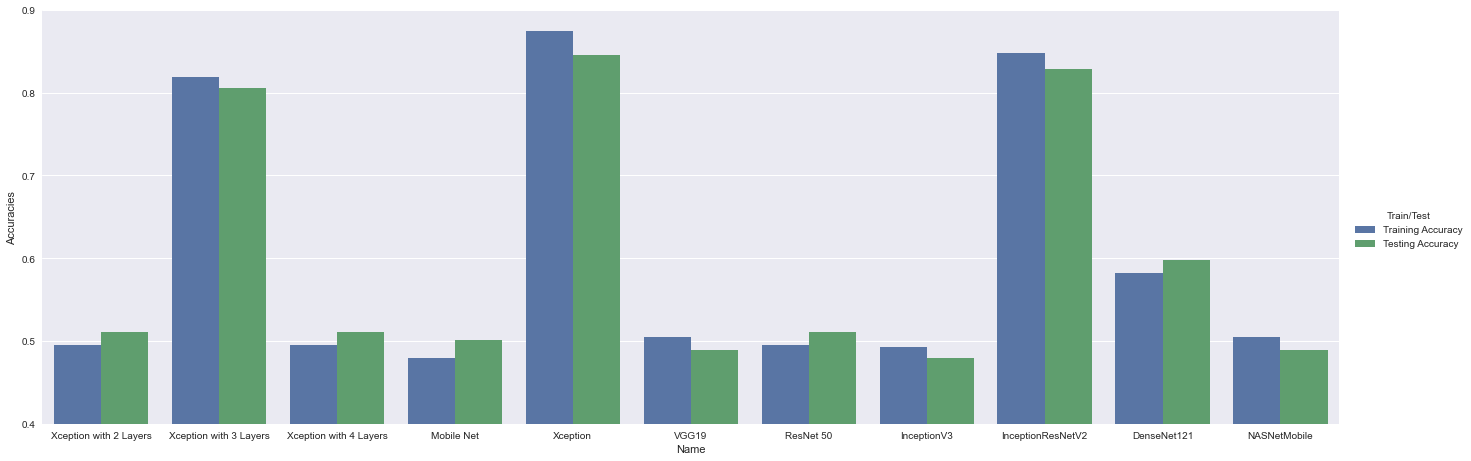

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
acc=sns.catplot(x="Name",y="Accuracies",hue="Train/Test",data=x,kind="bar",height=6.27,aspect=18.7/6.27)
acc.set(ylim=(0.4,0.9))

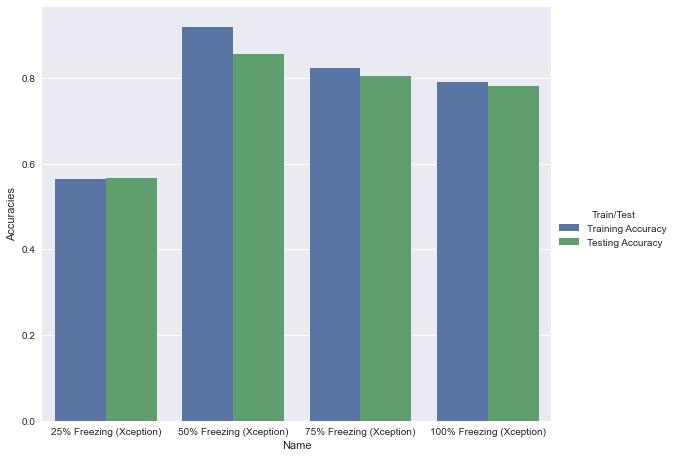

In [ ]:
sns.catplot(x="Name",y="Accuracies",hue="Train/Test",data=x1,kind="bar",height=6.27,aspect=7.7/6.27)